<a href="https://colab.research.google.com/github/kanjenggar/coursera-github-qwiklabs/blob/main/Food_Greenix/greenix_git_food_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.13.0rc1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 34.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.2
    Uninstalling tensorboard-2.12.2:
      Successfully uninstalled tensorboard-2.12.2
  Attempting uninstall: tensorflow
    Found

**Link Data:**
[Data Food Consumption](https://docs.google.com/spreadsheets/d/1xoFSoAtMQAEOL27kttt5OyJpPcANUm0D/edit#gid=864993682
)

**Keterangan kolom:**
- nomer: nomer urut responden
- nama: nama responden
- email: email responden
- tfep_kgco2e: total emisi dari seluruh makanan meliputi jagung, beras, singkong, kacangan-kacangan, daging unggas, minyak kelapa sawit 
- num_people_jagung: jumlah orang yang ikut makan jagung
- consumption_jagung: jumlah konsumsi jagung (kg)
- factor_jagung: nilai emisi dari jagung (kgCO2e)
- emission_jagung: total emisi per orang yang dihasilkan dari mengkonsumsi jagung (kg CO2e)
- num_people_beras: jumlah orang yang ikut makan beras
- consumption_beras: jumlah konsumsi beras (kg)
- factor_beras: nilai emisi dari beras (kgCO2e)
- emission_beras: total emisi per orang yang dihasilkan dari mengkonsumsi beras (kg CO2e)
- num_people_singkong: jumlah orang yang ikut makan singkong
- consumption_singkong: jumlah konsumsi singkong (kg)
- factor_singkong: nilai emisi dari singkong (kgCO2e)
- emission_singkong: total emisi per orang yang dihasilkan dari mengkonsumsi singkong (kg CO2e)
- num_people_kacang_kacangan: jumlah orang yang ikut makan kacang_kacangan
- consumption_kacang_kacangan: jumlah konsumsi kacang_kacangan (kg)
- factor_kacang_kacangan: nilai emisi dari kacang_kacangan (kgCO2e)
- emission_kacang_kacangan: total emisi per orang yang dihasilkan dari mengkonsumsi kacang_kacangan (kg CO2e)
- num_people_daging_unggas: jumlah orang yang ikut makan daging_unggas
- consumption_daging_unggas: jumlah konsumsi daging_unggas (kg)
- factor_daging_unggas: nilai emisi dari daging_unggas (kgCO2e)
- emission_daging_unggas: total emisi per orang yang dihasilkan dari mengkonsumsi daging_unggas (kg CO2e)
- num_people_minyak_kelapa_sawit: jumlah orang yang ikut makan minyak_kelapa_sawit
- consumption_minyak_kelapa_sawit: jumlah konsumsi minyak_kelapa_sawit (kg)
- factor_minyak_kelapa_sawit: nilai emisi dari minyak_kelapa_sawit (kgCO2e)
- emission_minyak_kelapa_sawit: total emisi per orang yang dihasilkan dari mengkonsumsi minyak_kelapa_sawit (kg CO2e)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA

In [3]:
# ppath file CSV yang telah diunggah
file_path = '/content/git_greenix_food.csv'

# Membaca file CSV ke DataFrame
df = pd.read_csv(file_path)

# Menampilkan baris pertama
print(df.head())

   nomer         nama                      email  tfep_kgco2e  \
0      1       Aan **       *******a02@gmail.com    10.225000   
1      2      Abdul *    *******e.4715@gmail.com     4.250000   
2      3  Abhiseqa **  *******adatezan@gmail.com     6.883333   
3      4    Achmad **     *******iki15@gmail.com     3.562500   
4      5    Achmad **          *******@gmail.com     2.775000   

   num_people_jagung  consumption_jagung  factor_jagung  emission_jagung  \
0                  2                0.00            2.3            0.000   
1                  1                0.25            2.3            0.575   
2                  1                0.00            2.3            0.000   
3                  1                0.00            2.3            0.000   
4                  1                0.25            2.3            0.575   

   num_people_beras  consumption_beras  ...  factor_kacang_kacangan  \
0                 2               0.50  ...                     3.8   
1         

In [4]:
# cek data duplikat
df.duplicated().sum()

0

In [5]:
# Membersihkan data yang tidak lengkap (Jika ada)
df = df.dropna(axis=0)

In [6]:
# Membersihkan data yang tidak lengkap (Jika ada)
df = df.dropna(axis=0)

In [7]:
df = df.drop(['factor_jagung', 'factor_beras', 'factor_singkong','factor_kacang_kacangan','factor_daging_unggas','factor_minyak_kelapa_sawit'], axis=1)

In [8]:
df.head()

,nomer,nama,email,tfep_kgco2e,num_people_jagung,consumption_jagung,emission_jagung,num_people_beras,consumption_beras,emission_beras,...,emission_singkong,num_people_kacang_kacangan,consumption_kacang_kacangan,emission_kacang_kacangan,num_people_daging_unggas,consumption_daging_unggas,emission_daging_unggas,num_people_minyak_kelapa_sawit,consumption_minyak_kelapa_sawit,emission_minyak_kelapa_sawit
0,1,Aan **,*******a02@gmail.com,10.225000,2,0.00,0.000,2,0.50,2.200000,...,0.000,5,0.00,0.00,1,0.25,5.0250,1,0.25,3.0
1,2,Abdul *,*******e.4715@gmail.com,4.250000,1,0.25,0.575,1,0.25,2.200000,...,0.525,1,0.25,0.95,2,0.00,0.0000,1,0.00,0.0
2,3,Abhiseqa **,*******adatezan@gmail.com,6.883333,1,0.00,0.000,3,1.00,2.933333,...,0.000,1,0.25,0.95,1,0.00,0.0000,1,0.25,3.0
3,4,Achmad **,*******iki15@gmail.com,3.562500,1,0.00,0.000,1,0.00,0.000000,...,1.050,1,0.00,0.00,2,0.25,2.5125,2,0.00,0.0
4,5,Achmad **,*******@gmail.com,2.775000,1,0.25,0.575,1,0.25,2.200000,...,0.000,1,0.00,0.00,1,0.00,0.0000,2,0.00,0.0


In [9]:
# Melihat jumlah baris dan kolom
df.shape

(653, 22)

In [10]:
# Melihat info statistik data
df.describe()

,nomer,tfep_kgco2e,num_people_jagung,consumption_jagung,emission_jagung,num_people_beras,consumption_beras,emission_beras,num_people_singkong,consumption_singkong,emission_singkong,num_people_kacang_kacangan,consumption_kacang_kacangan,emission_kacang_kacangan,num_people_daging_unggas,consumption_daging_unggas,emission_daging_unggas,num_people_minyak_kelapa_sawit,consumption_minyak_kelapa_sawit,emission_minyak_kelapa_sawit
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,327.000000,8.465791,1.517611,0.171899,0.322605,1.486983,0.459418,2.598673,1.523737,0.175345,0.305687,1.505360,0.187979,0.595241,1.476263,0.174579,2.881487,1.548239,0.176493,1.762098
std,188.649145,6.105886,1.019027,0.278696,0.545263,0.948958,0.396833,0.942678,0.997606,0.278438,0.499364,0.991707,0.285415,0.994897,0.948750,0.273365,4.872286,1.013506,0.293975,3.106719
min,1.000000,0.191667,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,164.000000,4.716667,1.000000,0.000000,0.000000,1.000000,0.250000,2.200000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,327.000000,7.437500,1.000000,0.000000,0.000000,1.000000,0.250000,2.200000,1.000000,0.000000,0.000000,1.000000,0.250000,0.237500,1.000000,0.250000,1.005000,1.000000,0.000000,0.000000
75%,490.000000,10.375000,2.000000,0.250000,0.575000,2.000000,0.500000,2.933333,2.000000,0.250000,0.525000,2.000000,0.250000,0.950000,2.000000,0.250000,5.025000,2.000000,0.250000,3.000000
max,653.000000,57.175000,5.000000,2.000000,4.600000,5.000000,2.000000,4.400000,5.000000,2.000000,4.200000,5.000000,2.000000,7.600000,5.000000,2.000000,40.200000,5.000000,2.000000,24.000000


In [11]:
# Melihat tipe data
print(df.dtypes)

nomer                                int64
nama                                object
email                               object
tfep_kgco2e                        float64
num_people_jagung                    int64
consumption_jagung                 float64
emission_jagung                    float64
num_people_beras                     int64
consumption_beras                  float64
emission_beras                     float64
num_people_singkong                  int64
consumption_singkong               float64
emission_singkong                  float64
num_people_kacang_kacangan           int64
consumption_kacang_kacangan        float64
emission_kacang_kacangan           float64
num_people_daging_unggas             int64
consumption_daging_unggas          float64
emission_daging_unggas             float64
num_people_minyak_kelapa_sawit       int64
consumption_minyak_kelapa_sawit    float64
emission_minyak_kelapa_sawit       float64
dtype: object


In [12]:
# melihat missing values
df[df==0].count()

nomer                                0
nama                                 0
email                                0
tfep_kgco2e                          0
num_people_jagung                    0
consumption_jagung                 328
emission_jagung                    328
num_people_beras                     0
consumption_beras                   18
emission_beras                      18
num_people_singkong                  0
consumption_singkong               329
emission_singkong                  329
num_people_kacang_kacangan           0
consumption_kacang_kacangan        310
emission_kacang_kacangan           310
num_people_daging_unggas             0
consumption_daging_unggas          322
emission_daging_unggas             322
num_people_minyak_kelapa_sawit       0
consumption_minyak_kelapa_sawit    333
emission_minyak_kelapa_sawit       333
dtype: int64

Pada tfep_kgco2e tidak terdapat user yang memiliki nilai 0 yang berarti seluruh responden melakukan konsumsi dari pilihan makanan sehingga seluruh responden menghasilkan emisi.
Pada makanan jagung terdapat 328 baris yang memiliki nilai 0, sedangkan pada makanan beras terdapat 18 baris yang memiliki nilai 0, pada makanan singkong terdapat 329 baris yang memiliki nilai 0, kemudian pada makanan kacang-kacangan terdapat 310 baris yang memiliki nilai 0, pada makanan daging unggas terdapat 322 baris yang memiliki nilai 0 dan terakhir pada makanan minyak kelapa sawit terdapat 333 baris yang memiliki nilai 0.

Seluruh baris tersebut tidak di drop karena responden bisa jadi tidak mengkonsumsi makanan tersebut pada hari tersebut.

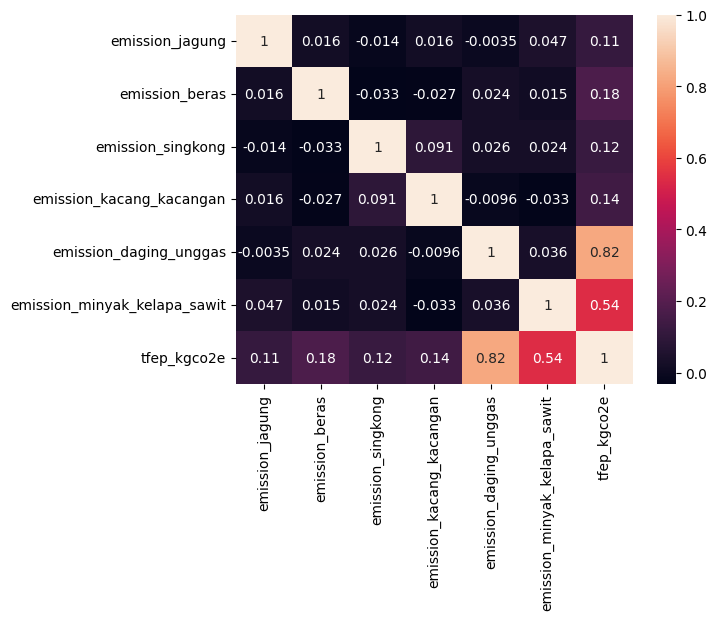

In [13]:
# Subset kolom emisi
emission_columns = ['emission_jagung', 'emission_beras', 'emission_singkong', 'emission_kacang_kacangan',
                    'emission_daging_unggas', 'emission_minyak_kelapa_sawit']

# Melihat korelasi antarkolom dengan kolom tfep_kgco2e
sns.heatmap(df[emission_columns + ['tfep_kgco2e']].corr(), annot=True)
plt.show()

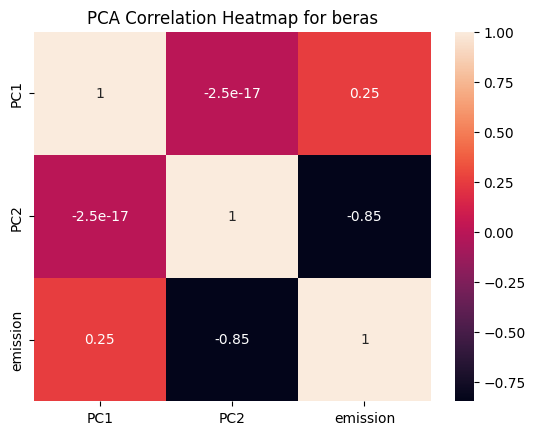

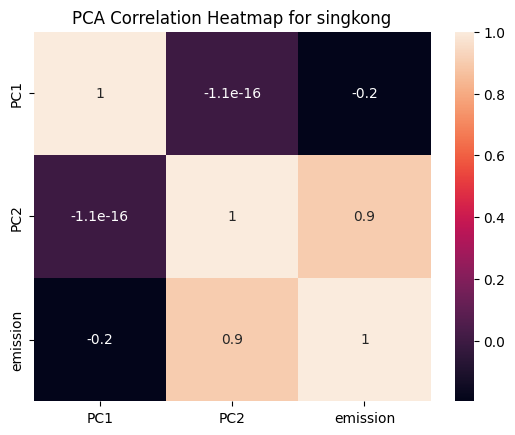

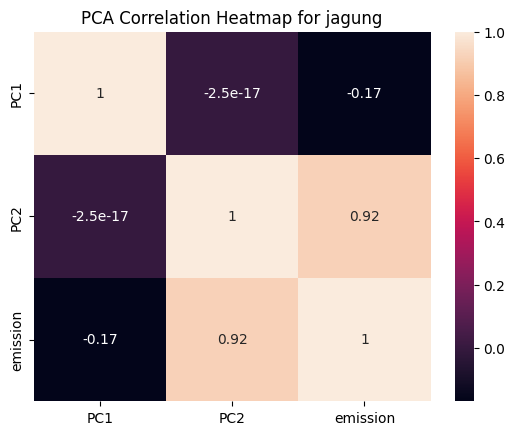

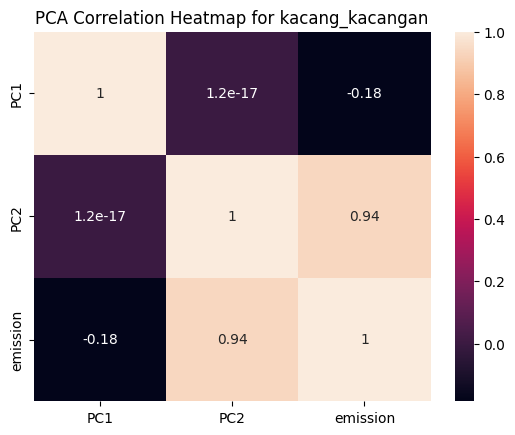

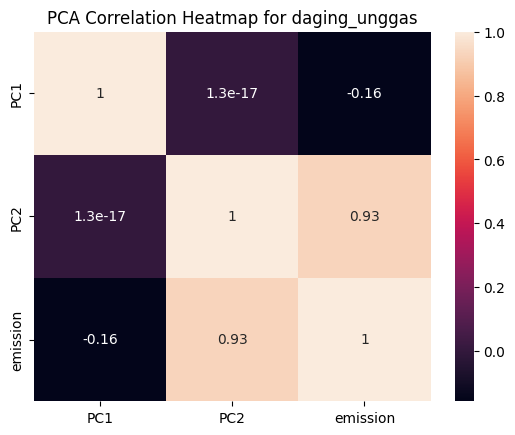

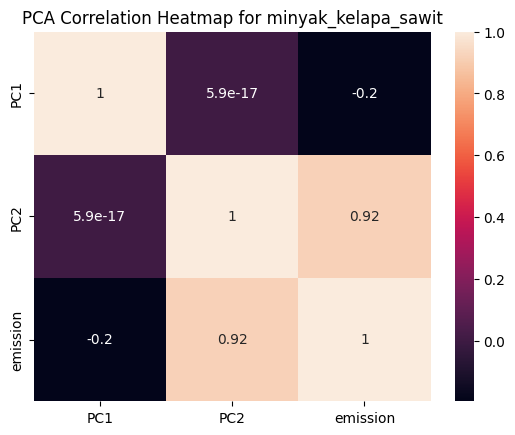

In [14]:
# Membaca file CSV ke DataFrame
df = pd.read_csv(file_path)

# Membersihkan data yang tidak lengkap (Jika ada)
df = df.dropna(axis=0)

# Daftar makanan yang ingin dianalisis
makanan_list = ['beras', 'singkong', 'jagung', 'kacang_kacangan', 'daging_unggas', 'minyak_kelapa_sawit']

# Meloop melalui setiap makanan
for makanan in makanan_list:
    # Subset kolom fitur
    features = df[[f'num_people_{makanan}', f'consumption_{makanan}']]
    
    # Menerapkan PCA pada fitur
    pca = PCA(n_components=2)
    transformed_features = pca.fit_transform(features)
    
    # Membuat DataFrame baru dari hasil PCA
    pca_df = pd.DataFrame(data=transformed_features, columns=['PC1', 'PC2'])
    
    # Menambahkan kolom target
    pca_df['emission'] = df[f'emission_{makanan}']
    
    # Melihat korelasi antar kolom dengan heatmap
    sns.heatmap(pca_df.corr(), annot=True)
    plt.title(f'PCA Correlation Heatmap for {makanan}')
    plt.show()


### PREDIKSI EMISI BERAS

In [15]:
# Memisahkan fitur dan target untuk beras
beras_features = df[['num_people_beras', 'consumption_beras']]
beras_target = df['emission_beras']

# Membagi data beras menjadi set pelatihan dan pengujian
beras_X_train, beras_X_test, beras_y_train, beras_y_test = train_test_split(beras_features, beras_target, test_size=0.2, random_state=42)

# Membuat model Sequential untuk beras
beras_model_tf = Sequential()
beras_model_tf.add(Dense(64, input_dim=beras_X_train.shape[1], activation=None))
beras_model_tf.add(Dropout(0.2))
beras_model_tf.add(Dense(32, activation=None))
beras_model_tf.add(Dropout(0.2))
beras_model_tf.add(Dense(1))
beras_model_tf.compile(loss='mean_absolute_error', optimizer=Adam())

# Membuat EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [16]:
# Melatih model dengan EarlyStopping callback
beras_model_tf.fit(beras_X_train, beras_y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
14/14 [==============================] - 1s 16ms/step - loss: 2.0797 - val_loss: 1.1034
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 1.1910 - val_loss: 0.9211
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 1.0929 - val_loss: 0.8834
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 1.0960 - val_loss: 0.8637
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 1.0305 - val_loss: 0.7966
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9856 - val_loss: 0.7432
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.9239 - val_loss: 0.6936
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.8912 - val_loss: 0.6450
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.8766 - val_loss: 0.5418
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.8060 - val_loss: 0.4568
Epoch 11

In [17]:
beras_y_pred_tf = beras_model_tf.predict(beras_X_test)
beras_mae_tf = mean_absolute_error(beras_y_test, beras_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk beras:")
print("MAE:", beras_mae_tf)


5/5 [==============================] - 0s 3ms/step
Hasil evaluasi performa model TensorFlow untuk beras:
MAE: 0.2983385442513218


In [18]:
# Simpan model untuk Beras
beras_model_tf.save('new_model_beras.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [46]:
# Memuat model yang telah disimpan
model = load_model('new_model_beras.h5')

# Menerima input dari pengguna
num_people_beras_new = float(input("Masukkan jumlah orang yang mengkonsumsi beras: "))
consumption_beras_new = float(input("Masukkan jumlah konsumsi beras: "))

# Membuat DataFrame dengan data baru
beras_data_baru = pd.DataFrame({'num_people_beras': [num_people_beras_new],
                          'consumption_beras': [consumption_beras_new]})

# Melakukan prediksi menggunakan model
prediksi_beras = model.predict(beras_data_baru)

# Menampilkan hasil prediksi
print("Hasil prediksi konsumsi beras:")
print(prediksi_beras)


Masukkan jumlah orang yang mengkonsumsi beras: 2
Masukkan jumlah konsumsi beras: 1
1/1 [==============================] - 0s 69ms/step
Hasil prediksi konsumsi beras:
[[3.5785487]]


### PREDIKSI EMISI SINGKONG

In [20]:
# Memisahkan fitur dan target untuk singkong
singkong_features = df[['num_people_singkong', 'consumption_singkong']]
singkong_target = df['emission_singkong']

# Membagi data singkong menjadi set pelatihan dan pengujian
singkong_X_train, singkong_X_test, singkong_y_train, singkong_y_test = train_test_split(singkong_features, singkong_target, test_size=0.2, random_state=42)

# Membuat model Sequential untuk singkong
singkong_model_tf = Sequential()
singkong_model_tf.add(Dense(64, input_dim=singkong_X_train.shape[1], activation=None))
singkong_model_tf.add(Dropout(0.2))
singkong_model_tf.add(Dense(32, activation=None))
singkong_model_tf.add(Dropout(0.2))
singkong_model_tf.add(Dense(1))
singkong_model_tf.compile(loss='mean_absolute_error', optimizer=Adam())

# Membuat EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [21]:
# Melatih model dengan EarlyStopping callback
singkong_model_tf.fit(singkong_X_train, singkong_y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
14/14 [==============================] - 1s 19ms/step - loss: 0.5641 - val_loss: 0.3627
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3775 - val_loss: 0.2086
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3389 - val_loss: 0.1716
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3439 - val_loss: 0.1625
Epoch 5/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2811 - val_loss: 0.1344
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2865 - val_loss: 0.1146
Epoch 7/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2590 - val_loss: 0.1529
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2513 - val_loss: 0.1906
Epoch 9/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2392 - val_loss: 0.1026
Epoch 10/100
14/14 [==============================] - 0s 6ms/step - loss: 0.1989 - val_loss: 0.0893
Epoch 11

In [22]:
singkong_y_pred_tf = singkong_model_tf.predict(singkong_X_test)
singkong_mae_tf = mean_absolute_error(singkong_y_test, singkong_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk singkong:")
print("MAE:", singkong_mae_tf)


5/5 [==============================] - 0s 3ms/step
Hasil evaluasi performa model TensorFlow untuk singkong:
MAE: 0.08072665391788457


In [23]:
# Simpan model untuk Singkong
singkong_model_tf.save('new_model_singkong.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
# Memuat model yang telah disimpan
model = load_model('new_model_singkong.h5')

# Menerima input dari pengguna
num_people_singkong_new = float(input("Masukkan jumlah orang yang mengkonsumsi singkong: "))
consumption_singkong_new = float(input("Masukkan jumlah konsumsi singkong: "))

# Membuat DataFrame dengan data baru
singkong_data_baru = pd.DataFrame({'num_people_singkong': [num_people_singkong_new],
                          'consumption_singkong': [consumption_singkong_new]})

# Melakukan prediksi menggunakan model
prediksi_singkong = model.predict(singkong_data_baru)

# Menampilkan hasil prediksi
print("Hasil prediksi konsumsi singkong:")
print(prediksi_singkong)


Masukkan jumlah orang yang mengkonsumsi singkong: 1
Masukkan jumlah konsumsi singkong: 1
1/1 [==============================] - 0s 54ms/step
Hasil prediksi konsumsi singkong:
[[1.9077244]]


### PREDIKSI EMISI JAGUNG

In [25]:
# Memisahkan fitur dan target untuk jagung
jagung_features = df[['num_people_jagung', 'consumption_jagung']]
jagung_target = df['emission_jagung']

# Membagi data jagung menjadi set pelatihan dan pengujian
jagung_X_train, jagung_X_test, jagung_y_train, jagung_y_test = train_test_split(jagung_features, jagung_target, test_size=0.2, random_state=42)

# Membuat model Sequential untuk jagung
jagung_model_tf = Sequential()
jagung_model_tf.add(Dense(64, input_dim=jagung_X_train.shape[1], activation=None))
jagung_model_tf.add(Dropout(0.2))
jagung_model_tf.add(Dense(32, activation=None))
jagung_model_tf.add(Dropout(0.2))
jagung_model_tf.add(Dense(1))
jagung_model_tf.compile(loss='mean_absolute_error', optimizer=Adam())

# Membuat EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [26]:
# Melatih model dengan EarlyStopping callback
jagung_model_tf.fit(jagung_X_train, jagung_y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
14/14 [==============================] - 1s 13ms/step - loss: 0.5248 - val_loss: 0.4200
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4056 - val_loss: 0.2794
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3218 - val_loss: 0.2171
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3054 - val_loss: 0.1709
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2387 - val_loss: 0.1318
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2477 - val_loss: 0.1000
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2183 - val_loss: 0.1021
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2282 - val_loss: 0.1219
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2212 - val_loss: 0.1243
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2072 - val_loss: 0.1266
Epoch 11

In [27]:
jagung_y_pred_tf = jagung_model_tf.predict(jagung_X_test)
jagung_mae_tf = mean_absolute_error(jagung_y_test, jagung_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk jagung:")
print("MAE:", jagung_mae_tf)


5/5 [==============================] - 0s 3ms/step
Hasil evaluasi performa model TensorFlow untuk jagung:
MAE: 0.10614433675371797


In [28]:
# Simpan model untuk Jagung
jagung_model_tf.save('new_model_jagung.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
# Memuat model yang telah disimpan
model = load_model('new_model_jagung.h5')

# Menerima input dari pengguna
num_people_jagung_new = float(input("Masukkan jumlah orang yang mengkonsumsi jagung: "))
consumption_jagung_new = float(input("Masukkan jumlah konsumsi jagung: "))

# Membuat DataFrame dengan data baru
jagung_data_baru = pd.DataFrame({'num_people_jagung': [num_people_jagung_new],
                          'consumption_jagung': [consumption_jagung_new]})

# Melakukan prediksi menggunakan model
prediksi_jagung = model.predict(jagung_data_baru)

# Menampilkan hasil prediksi
print("Hasil prediksi konsumsi jagung:")
print(prediksi_jagung)


Masukkan jumlah orang yang mengkonsumsi jagung: 1
Masukkan jumlah konsumsi jagung: 1
1/1 [==============================] - 0s 55ms/step
Hasil prediksi konsumsi jagung:
[[1.8865012]]


### PREDIKSI EMISI KACANG-KACANGAN

In [30]:
# Memisahkan fitur dan target untuk kacang-kacangan
kacang_features = df[['num_people_kacang_kacangan', 'consumption_kacang_kacangan']]
kacang_target = df['emission_kacang_kacangan']

# Membagi data kacang-kacangan menjadi set pelatihan dan pengujian
kacang_X_train, kacang_X_test, kacang_y_train, kacang_y_test = train_test_split(kacang_features, kacang_target, test_size=0.2, random_state=42)

# Membuat model Sequential untuk kacang-kacangan
kacang_model_tf = Sequential()
kacang_model_tf.add(Dense(64, input_dim=kacang_X_train.shape[1], activation=None))
kacang_model_tf.add(Dropout(0.2))
kacang_model_tf.add(Dense(32, activation=None))
kacang_model_tf.add(Dropout(0.2))
kacang_model_tf.add(Dense(1))
kacang_model_tf.compile(loss='mean_absolute_error', optimizer=Adam())

# Membuat EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [31]:
# Melatih model dengan EarlyStopping callback
kacang_model_tf.fit(kacang_X_train, kacang_y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
14/14 [==============================] - 1s 14ms/step - loss: 0.6910 - val_loss: 0.5199
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5951 - val_loss: 0.4344
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 0.5338 - val_loss: 0.3470
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4708 - val_loss: 0.2785
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3889 - val_loss: 0.2633
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3314 - val_loss: 0.2045
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.2872 - val_loss: 0.1642
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2912 - val_loss: 0.1991
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2452 - val_loss: 0.1563
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2656 - val_loss: 0.1553
Epoch 11

In [32]:
kacang_y_pred_tf = kacang_model_tf.predict(kacang_X_test)
kacang_mae_tf = mean_absolute_error(kacang_y_test, kacang_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk kacang-kacangan:")
print("MAE:", kacang_mae_tf)


5/5 [==============================] - 0s 2ms/step
Hasil evaluasi performa model TensorFlow untuk kacang-kacangan:
MAE: 0.1130290971055488


In [33]:
# Simpan model untuk kacang-kacangan
kacang_model_tf.save('new_model_kacang.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
# Memuat model yang telah disimpan
model = load_model('new_model_kacang.h5')

# Menerima input dari pengguna
num_people_kacang_new = float(input("Masukkan jumlah orang yang mengkonsumsi kacang-kacangan: "))
consumption_kacang_new = float(input("Masukkan jumlah konsumsi kacang-kacangan: "))

# Membuat DataFrame dengan data baru
kacang_data_baru = pd.DataFrame({'num_people_kacang': [num_people_kacang_new],
                          'consumption_kacang': [consumption_kacang_new]})

# Melakukan prediksi menggunakan model
prediksi_kacang = model.predict(kacang_data_baru)

# Menampilkan hasil prediksi
print("Hasil prediksi konsumsi kacang-kacangan:")
print(prediksi_kacang)


Masukkan jumlah orang yang mengkonsumsi kacang-kacangan: 1
Masukkan jumlah konsumsi kacang-kacangan: 1
1/1 [==============================] - 0s 55ms/step
Hasil prediksi konsumsi kacang-kacangan:
[[3.53223]]


### PREDIKSI EMISI DAGING

In [35]:
# Memisahkan fitur dan target untuk daging
daging_features = df[['num_people_daging_unggas', 'consumption_daging_unggas']]
daging_target = df['emission_daging_unggas']

# Membagi data daging menjadi set pelatihan dan pengujian
daging_X_train, daging_X_test, daging_y_train, daging_y_test = train_test_split(daging_features, daging_target, test_size=0.2, random_state=42)

# Membuat model Sequential untuk daging
daging_model_tf = Sequential()
daging_model_tf.add(Dense(64, input_dim=daging_X_train.shape[1], activation=None))
daging_model_tf.add(Dropout(0.2))
daging_model_tf.add(Dense(32, activation=None))
daging_model_tf.add(Dropout(0.2))
daging_model_tf.add(Dense(1))
daging_model_tf.compile(loss='mean_absolute_error', optimizer=Adam())

# Membuat EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)


In [36]:
# Melatih model dengan EarlyStopping callback
daging_model_tf.fit(daging_X_train, daging_y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
14/14 [==============================] - 1s 14ms/step - loss: 2.7460 - val_loss: 3.1911
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 2.6437 - val_loss: 3.0640
Epoch 3/100
14/14 [==============================] - 0s 4ms/step - loss: 2.5536 - val_loss: 2.9209
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 2.3891 - val_loss: 2.7760
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 2.3247 - val_loss: 2.6660
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 2.1469 - val_loss: 2.4476
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 2.0096 - val_loss: 2.2324
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 1.8562 - val_loss: 2.0307
Epoch 9/100
14/14 [==============================] - 0s 4ms/step - loss: 1.7261 - val_loss: 1.7808
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 1.5534 - val_loss: 1.6145
Epoch 11

In [37]:
daging_y_pred_tf = daging_model_tf.predict(daging_X_test)
daging_mae_tf = mean_absolute_error(daging_y_test, daging_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk daging:")
print("MAE:", daging_mae_tf)


5/5 [==============================] - 0s 2ms/step
Hasil evaluasi performa model TensorFlow untuk daging:
MAE: 0.6182376171568879


In [38]:
# Simpan model untuk Daging
daging_model_tf.save('new_model_daging.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# Memuat model yang telah disimpan
model = load_model('new_model_daging.h5')

# Menerima input dari pengguna
num_people_daging_new = float(input("Masukkan nilai num_people_daging baru: "))
consumption_daging_new = float(input("Masukkan nilai consumption_daging baru: "))

# Membuat DataFrame dengan data baru
data_baru = pd.DataFrame({'num_people_daging': [num_people_daging_new],
                          'consumption_daging': [consumption_daging_new]})

# Melakukan prediksi menggunakan model
prediksi_daging = model.predict(data_baru)

# Menampilkan hasil prediksi
print("Hasil prediksi konsumsi daging:")
print(prediksi_daging)


Masukkan nilai num_people_daging baru: 1
Masukkan nilai consumption_daging baru: 1
1/1 [==============================] - 0s 81ms/step
Hasil prediksi konsumsi daging:
[[17.954044]]


### PREDIKSI EMISI MINYAK

In [40]:
# Memisahkan fitur dan target untuk minyak
minyak_features = df[['num_people_minyak_kelapa_sawit', 'consumption_minyak_kelapa_sawit']]
minyak_target = df['emission_minyak_kelapa_sawit']

# Membagi data minyak menjadi set pelatihan dan pengujian
minyak_X_train, minyak_X_test, minyak_y_train, minyak_y_test = train_test_split(minyak_features, minyak_target, test_size=0.2, random_state=42)

# Membuat model Sequential untuk minyak
minyak_model_tf = Sequential()
minyak_model_tf.add(Dense(64, input_dim=minyak_X_train.shape[1], activation=None))
minyak_model_tf.add(Dropout(0.2))
minyak_model_tf.add(Dense(32, activation=None))
minyak_model_tf.add(Dropout(0.2))
minyak_model_tf.add(Dense(1))
minyak_model_tf.compile(loss='mean_absolute_error', optimizer=Adam())

# Membuat EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [41]:
# Melatih model dengan EarlyStopping callback
minyak_model_tf.fit(minyak_X_train, minyak_y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
14/14 [==============================] - 1s 20ms/step - loss: 1.7636 - val_loss: 1.3826
Epoch 2/100
14/14 [==============================] - 0s 7ms/step - loss: 1.6431 - val_loss: 1.4270
Epoch 3/100
14/14 [==============================] - 0s 6ms/step - loss: 1.5538 - val_loss: 1.3126
Epoch 4/100
14/14 [==============================] - 0s 6ms/step - loss: 1.4791 - val_loss: 1.2115
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 1.3665 - val_loss: 1.1382
Epoch 6/100
14/14 [==============================] - 0s 6ms/step - loss: 1.2385 - val_loss: 0.9638
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 1.0762 - val_loss: 0.8617
Epoch 8/100
14/14 [==============================] - 0s 6ms/step - loss: 0.9815 - val_loss: 0.7755
Epoch 9/100
14/14 [==============================] - 0s 7ms/step - loss: 0.8758 - val_loss: 0.6867
Epoch 10/100
14/14 [==============================] - 0s 8ms/step - loss: 0.7603 - val_loss: 0.6048
Epoch 11

In [42]:
minyak_y_pred_tf = minyak_model_tf.predict(minyak_X_test)
minyak_mae_tf = mean_absolute_error(minyak_y_test, minyak_y_pred_tf)
print("Hasil evaluasi performa model TensorFlow untuk minyak:")
print("MAE:", minyak_mae_tf)


5/5 [==============================] - 0s 3ms/step
Hasil evaluasi performa model TensorFlow untuk minyak:
MAE: 0.6407227665413426


In [43]:
# Simpan model untuk Minyak
minyak_model_tf.save('new_model_minyak.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [44]:
# Memuat model yang telah disimpan
model = load_model('new_model_minyak.h5')

# Menerima input dari pengguna
num_people_minyak_new = float(input("Masukkan jumlah orang yang mengkonsumsi minyak: "))
consumption_minyak_new = float(input("Masukkan jumlah konsumsi minyak: "))

# Membuat DataFrame dengan data baru
minyak_data_baru = pd.DataFrame({'num_people_minyak': [num_people_minyak_new],
                          'consumption_minyak': [consumption_minyak_new]})

# Melakukan prediksi menggunakan model
prediksi_minyak = model.predict(minyak_data_baru)

# Menampilkan hasil prediksi
print("Hasil prediksi konsumsi minyak:")
print(prediksi_minyak)


Masukkan jumlah orang yang mengkonsumsi minyak: 1
Masukkan jumlah konsumsi minyak: 1
1/1 [==============================] - 0s 92ms/step
Hasil prediksi konsumsi minyak:
[[11.004383]]


In [45]:
# List nama file model h5
model_files = [
    'new_model_beras.h5',
    'new_model_daging.h5',
    'new_model_jagung.h5',
    'new_model_kacang.h5',
    'new_model_minyak.h5',
    'new_model_singkong.h5'
]

for model_file in model_files:
    # Memuat model
    model = load_model(model_file)

    # Konversi model TensorFlow ke model TFLite
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    tflite_model = converter.convert()

    # Simpan model TFLite
    tflite_filename = model_file.replace('.h5', '.tflite')
    with open(tflite_filename, 'wb') as f:
        f.write(tflite_model)

    print(f"Model {model_file} berhasil dikonversi menjadi {tflite_filename}")


Model new_model_beras.h5 berhasil dikonversi menjadi new_model_beras.tflite
Model new_model_daging.h5 berhasil dikonversi menjadi new_model_daging.tflite
Model new_model_jagung.h5 berhasil dikonversi menjadi new_model_jagung.tflite
Model new_model_kacang.h5 berhasil dikonversi menjadi new_model_kacang.tflite
Model new_model_minyak.h5 berhasil dikonversi menjadi new_model_minyak.tflite
Model new_model_singkong.h5 berhasil dikonversi menjadi new_model_singkong.tflite
